# ** Basic Cognitive Services Examples **

This set of examples is intended to illustrate the basics of calling the various cognitive serices apis via the SynapseML libraries.  These samples are intended to be functional with minimal external dependencies therefore they typically work on extremely small data sets and to not load external files except where absolutely necessary (ie. images).

The majority of these examples are taken from the Synapse ML examples: https://microsoft.github.io/SynapseML/docs/documentation/transformers/transformers_cognitive/ 
They have been modified slightly to account for pulling keys from key vault, and also to beautify the results and make them easier to read when executing in a jupyter notebook.  They are included here for the sake of completeness and also  

Several of the APIs illustrated in these examples will be illustrated in greater detail on other examples with larger datasets and leveraging external files.

## ***Prerequisites ***

1. A provisioned Synapse Workspace with a Spark 3.1 pool to run this notbook on.
1. A keyvault to store the cognitive services key necessary for executing these examples.
1. A provisioined cognitive services multi-endpont api instance.

## *** Setup ***

This first part is necessary to setup the cluster to leverage the SynapseML libraries which are loaded from Maven coordinates.

In [1]:
%%configure -f
{
  "name": "synapseml",
  "conf": {
      "spark.jars.packages": "com.microsoft.azure:synapseml_2.12:0.9.5-13-d1b51517-SNAPSHOT",
      "spark.jars.repositories": "https://mmlspark.azureedge.net/maven",
      "spark.jars.excludes": "org.scala-lang:scala-reflect,org.apache.spark:spark-tags_2.12,org.scalactic:scalactic_2.12,org.scalatest:scalatest_2.12",
      "spark.yarn.user.classpath.first": "true"
  }
}

StatementMeta(, 27, -1, Finished, Available)

To start we'll import a bunch of necessary modules and setup values for some resoruces like storage accounts, container, and keyvault that we'll use throughout the rest of the example.

In [2]:
from synapse.ml.cognitive import *
import pyspark
from pyspark.sql.functions import *  #needed for basic column manipulation like flattening json

#Input your key vault information.  The secret we need is for the cognitive services multi-service resource.
#set the name of your key vault
keyVaultName = "cgmsynapsevault"
#set the region where you cognitive service is deployed
serviceLocation = "eastus2"
cogServicesKey = mssparkutils.credentials.getSecret(keyVaultName, "cogsvcskey")



StatementMeta(synapsemlpool, 27, 1, Finished, Available)

## ** Computer Vision Service **

https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/

*** OCR ***

The Optical character recognition extracts text from an image.

https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/overview-ocr

In [3]:
df = spark.createDataFrame([
        ("https://mmlspark.blob.core.windows.net/datasets/OCR/test3.png", ),
    ], ["url", ])

ocr = (OCR()
        .setSubscriptionKey(cogServicesKey)
        .setLocation(serviceLocation)
        .setImageUrlCol("url")
        .setDetectOrientation(True)
        .setOutputCol("ocr")
        .setErrorCol("error"))

results = ocr.transform(df).select("ocr")
            
display(results)

StatementMeta(synapsemlpool, 27, 2, Finished, Available)

SynapseWidget(Synapse.DataFrame, dae40dfd-7342-4458-8985-20312b6b2adb)

***  Image Analysis ***

The image analysis API detects objects within an image like faces, landmarks, etc. and can be used to generate descriptiosn of images.

https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/overview-image-analysis

In [4]:
df = spark.createDataFrame([
        ("https://mmlspark.blob.core.windows.net/datasets/OCR/test1.jpg", "en"),
        ("https://mmlspark.blob.core.windows.net/datasets/OCR/test2.png", None),
        ("https://mmlspark.blob.core.windows.net/datasets/OCR/test3.png", "en")
    ], ["image", "language"])


ai = (AnalyzeImage()
        .setSubscriptionKey(cogServicesKey)
        .setLocation(serviceLocation)
        .setImageUrlCol("image")
        .setLanguageCol("language")
        .setVisualFeatures(["Categories", "Tags", "Description", "Faces", "ImageType", "Color", "Adult", "Objects", "Brands"])
        .setDetails(["Celebrities", "Landmarks"])
        .setOutputCol("features"))

results = ai.transform(df).select("features")
display(results)

StatementMeta(synapsemlpool, 27, 3, Finished, Available)

SynapseWidget(Synapse.DataFrame, 7b08e255-fcc8-45ee-ab9c-5308b2ffa876)

In [5]:
df = spark.createDataFrame([
        ("https://mmlspark.blob.core.windows.net/datasets/OCR/test1.jpg", ),
        ("https://mmlspark.blob.core.windows.net/datasets/OCR/test2.png", ),
        ("https://mmlspark.blob.core.windows.net/datasets/OCR/test3.png", )
    ], ["url", ])

rt = (RecognizeText()
        .setSubscriptionKey(cogServicesKey)
        .setLocation(serviceLocation)
        .setImageUrlCol("url")
        .setMode("Printed")
        .setOutputCol("ocr")
        .setConcurrency(5))

results = rt.transform(df).select("ocr")
display(results)

StatementMeta(synapsemlpool, 27, 4, Finished, Available)

SynapseWidget(Synapse.DataFrame, 0f61a427-90dd-432e-9709-6bc9db293493)

Note...  this is the current version of the API and is recommended for use over the OCR and RecognizeText variants.

In [6]:
df = spark.createDataFrame([
        ("https://mmlspark.blob.core.windows.net/datasets/OCR/test1.jpg", ),
        ("https://mmlspark.blob.core.windows.net/datasets/OCR/test2.png", ),
        ("https://mmlspark.blob.core.windows.net/datasets/OCR/test3.png", )
    ], ["url", ])

ri = (ReadImage()
    .setSubscriptionKey(cogServicesKey)
    .setLocation(serviceLocation)
    .setImageUrlCol("url")
    .setOutputCol("ocr")
    .setConcurrency(5))

results = ri.transform(df).select("ocr")
display(results)

StatementMeta(synapsemlpool, 27, 5, Finished, Available)

SynapseWidget(Synapse.DataFrame, 4eda9039-a68d-4c0c-afc1-e1a6ba46413a)

In [7]:
df = spark.createDataFrame([
        ("https://mmlspark.blob.core.windows.net/datasets/DSIR/test2.jpg", )
    ], ["url", ])

celeb = (RecognizeDomainSpecificContent()
        .setSubscriptionKey(cogServicesKey)
        .setModel("celebrities")
        .setLocation(serviceLocation)
        .setImageUrlCol("url")
        .setOutputCol("celebs"))

results = celeb.transform(df).select("celebs")
display(results)

StatementMeta(synapsemlpool, 27, 6, Finished, Available)

SynapseWidget(Synapse.DataFrame, 936aa269-721d-44b5-917b-e5b7c473fd5a)

StatementMeta(synapsemlpool, 27, 52, Finished, Available)

+--------------------+
|          thumbnails|
+--------------------+
|[FF D8 FF E0 00 1...|
+--------------------+



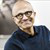

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO

df = spark.createDataFrame([
        ("https://mmlspark.blob.core.windows.net/datasets/DSIR/test1.jpg", )
    ], ["url", ])

gt = (GenerateThumbnails()
        .setSubscriptionKey(cogServicesKey)
        .setLocation(serviceLocation)
        .setHeight(50)
        .setWidth(50)
        .setSmartCropping(True)
        .setImageUrlCol("url")
        .setOutputCol("thumbnails"))

gt.transform(df).select("thumbnails").show()

#Convert the cell to a pandas dataframe to get at the bytes
results = gt.transform(df).select("thumbnails").toPandas()

#Turn the bytes into a bytestream so we can open it as an image
im = Image.open(BytesIO(cellbytes[0,0]))

# Display the image
im.show()



In [ ]:
df = spark.createDataFrame([
        ("https://mmlspark.blob.core.windows.net/datasets/DSIR/test1.jpg", )
    ], ["url", ])

ti = (TagImage()
        .setSubscriptionKey(cogServicesKey)
        .setLocation(serviceLocation)
        .setImageUrlCol("url")
        .setOutputCol("tags"))

results = ti.transform(df).select("tags")

image = Image.open()
display(results)

StatementMeta(, , , Cancelled, )

In [ ]:
df = spark.createDataFrame([
        ("https://mmlspark.blob.core.windows.net/datasets/DSIR/test1.jpg", )
    ], ["url", ])

di = (DescribeImage()
        .setSubscriptionKey(cogServicesKey)
        .setLocation(serviceLocation)
        .setMaxCandidates(3)
        .setImageUrlCol("url")
        .setOutputCol("descriptions"))

results = di.transform(df)
display(results)

StatementMeta(, , , Cancelled, )